## Imports, Mount Drive

In [1]:
from google.colab import drive
# Dont forget to mount drive! We have our data in our google drive, I downloaded the data from kaggle.
drive.mount('/content/drive/', force_remount=False)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [3]:
# linux system commands
%cd '/content/drive/My Drive/inzva/hw1/'
!ls

/content/drive/My Drive/inzva/hw1
data_hand_pose.pickle  el1.jpg	model.ipynb  preprocessing.ipynb


## Data Examination

In [4]:
import pickle
dataset = {}
with open("data_hand_pose.pickle", "rb") as f:
  dataset = pickle.load(f, encoding="bytes")

In [5]:
print(len(dataset['images']))
print(len(dataset['joints']))
dataset_size=len(dataset['images'])

9432
9432


In [6]:
padded_array=[]
joints_array=[]

In [7]:
for k,v in sorted(dataset["images"].items()):
  padded_array.append(np.asarray(v))

In [8]:
for k,v in sorted(dataset["joints"].items()):
  joints_array.append(v)

In [9]:
padded_array=np.array(padded_array)
joints_array=np.array(joints_array)

In [10]:
print("padded shape : {}" .format( padded_array.shape))
print("joints shape : {}" .format(joints_array.shape))

padded shape : (9432, 290, 334, 3)
joints shape : (9432, 21, 2)


In [11]:
input_tensor = padded_array
labels = joints_array
print("inputs shape : {}" .format(input_tensor.shape[1:4]))

inputs shape : (290, 334, 3)


In [12]:
del padded_array,joints_array

In [13]:
labels = labels.reshape((labels.shape[0],labels.shape[1]*labels.shape[2]))
print("labels shape : {}".format(labels.shape))

labels shape : (9432, 42)


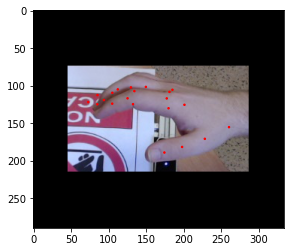

In [14]:
from matplotlib.pyplot import Circle

index = random.randint(0,1000)

fig, ax = plt.subplots(1)
ax.set_aspect('equal')

ax.imshow(input_tensor[index].reshape(input_tensor.shape[1:4]))

for xx, yy in labels[index].reshape((21,2)):
    circ = Circle((xx,yy),1,color='red')
    ax.add_patch(circ)

In [15]:
dataset = None

Now you need to setup your model. Set a CNN with appopriate hyperparameters to predict the joint coordinates from any image.

## Model 1
Similar to the following network, shorter networks.

https://github.com/inzva/Applied-AI-Study-Group-2020-June/blob/master/week1/4-%20kaggle_localisation_conv_keras.ipynb

In [16]:
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.layers import Activation, Convolution2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, Conv2D,MaxPool2D, ZeroPadding2D

Using TensorFlow backend.


In [17]:
model = Sequential()

model.add(Convolution2D(32, (5,5), kernel_initializer = 'glorot_uniform', strides=[2,2], padding='same', use_bias=False, input_shape=input_tensor.shape[1:4]))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Convolution2D(64, (5,5), kernel_initializer = 'glorot_uniform', strides=[2,2], padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Convolution2D(96, (5,5), kernel_initializer = 'glorot_uniform', strides=[2,2],padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Convolution2D(128,(5,5), kernel_initializer = 'glorot_uniform',strides=[2,2], padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Convolution2D(256, (5,5), kernel_initializer = 'glorot_uniform',strides=[2,2], padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(42))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 145, 167, 32)      2400      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 145, 167, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 145, 167, 32)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 145, 167, 32)      128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 73, 84, 64)        51200     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 73, 84, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 73, 84, 64)       

In [18]:
model.compile(optimizer='adam', 
              loss='mean_squared_error',
              metrics=['mae'])

In [19]:
model.fit(input_tensor[0:9000],labels[0:9000],epochs = 10,batch_size = 128,validation_split = 0.2)

Train on 7200 samples, validate on 1800 samples
Epoch 1/10
7200/7200 [==============================] - 26s 4ms/step - loss: 6084.3841 - mae: 56.3276 - val_loss: 8159803.5689 - val_mae: 2463.4448
Epoch 2/10
7200/7200 [==============================] - 18s 3ms/step - loss: 718.8742 - mae: 20.8441 - val_loss: 67561.6883 - val_mae: 201.3004
Epoch 3/10
7200/7200 [==============================] - 18s 3ms/step - loss: 557.3390 - mae: 18.2609 - val_loss: 4204.4148 - val_mae: 50.5395
Epoch 4/10
7200/7200 [==============================] - 18s 3ms/step - loss: 452.2666 - mae: 16.4456 - val_loss: 997.1816 - val_mae: 25.1275
Epoch 5/10
7200/7200 [==============================] - 18s 3ms/step - loss: 401.8825 - mae: 15.4378 - val_loss: 1144.2651 - val_mae: 28.6020
Epoch 6/10
7200/7200 [==============================] - 18s 3ms/step - loss: 352.5354 - mae: 14.5152 - val_loss: 519.2983 - val_mae: 17.9476
Epoch 7/10
7200/7200 [==============================] - 18s 3ms/step - loss: 317.5465 - mae: 1

In [20]:
model.save('model1_10_epoch.h5')

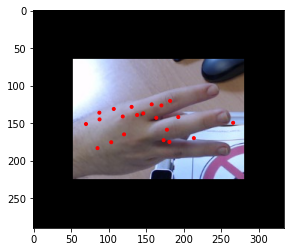

In [22]:
# visualize a prediction
from matplotlib.pyplot import Circle
a = 433
randomsayi = random.randint(0,a-1)


preds = model.predict(input_tensor[-a:])


fig, ax = plt.subplots(1)
ax.set_aspect('equal')

ax.imshow(input_tensor[randomsayi].reshape(input_tensor.shape[1:4]))

for xx, yy in preds[randomsayi].reshape((21,2)):
    circ = Circle((xx,yy),2,color='red')
    ax.add_patch(circ)

### Own Image

(290, 334, 3)


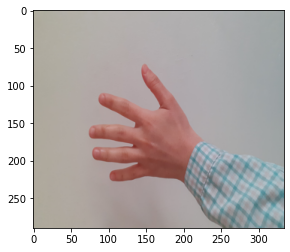

In [23]:
from PIL import Image
image = Image.open("el1.jpg")

newsize = (334, 290)
im1 = image.resize(newsize) 
plt.imshow(im1) 

im1=np.asarray(im1)
print(im1.shape)

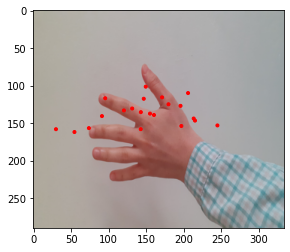

In [24]:
preds = model.predict(np.asarray([im1]))

fig, ax = plt.subplots(1)
ax.set_aspect('equal')

ax.imshow(im1)

for xx, yy in preds.reshape((21,2)):
    circ = Circle((xx,yy),2,color='red')
    ax.add_patch(circ)

In [25]:
del model

## Model 2
The following network is used

https://github.com/inzva/Applied-AI-Study-Group-2020-June/blob/master/week3/2-%20HW1%20Hand%20Keypoint%20Detection%20Model.ipynb



In [26]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, BatchNormalization

In [27]:
model = Sequential()

model.add(Conv2D(32, padding = "VALID", kernel_initializer = 'glorot_uniform', kernel_size = [4,4], strides=[2,2],input_shape=input_tensor.shape[1:4],activation='relu'))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Conv2D(64, padding = "VALID", kernel_initializer = 'glorot_uniform', kernel_size = [4,4], strides=[2,2],input_shape=input_tensor.shape[1:4],activation='relu'))
model.add(Dropout(0.25))


model.add(BatchNormalization())
model.add(Conv2D(128, padding = "VALID", kernel_initializer = 'glorot_uniform', kernel_size = [4,4], strides=[2,2],input_shape=input_tensor.shape[1:4],activation='relu'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(42,activation='relu'))

In [28]:
model.compile(loss='mse',optimizer=keras.optimizers.Adam(lr=0.0001))

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 144, 166, 32)      1568      
_________________________________________________________________
dropout_7 (Dropout)          (None, 144, 166, 32)      0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 144, 166, 32)      128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 71, 82, 64)        32832     
_________________________________________________________________
dropout_8 (Dropout)          (None, 71, 82, 64)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 71, 82, 64)        256       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 40, 128)      

In [30]:
model.fit(input_tensor[0:9000],labels[0:9000],epochs = 10,batch_size = 64,validation_split = 0.2)

Train on 7200 samples, validate on 1800 samples
Epoch 1/10
7200/7200 [==============================] - 19s 3ms/step - loss: 15207.4576 - val_loss: 12817.8206
Epoch 2/10
7200/7200 [==============================] - 18s 2ms/step - loss: 6203.5036 - val_loss: 3443.9408
Epoch 3/10
7200/7200 [==============================] - 18s 2ms/step - loss: 3336.4651 - val_loss: 900.4822
Epoch 4/10
7200/7200 [==============================] - 18s 2ms/step - loss: 2260.3282 - val_loss: 691.5785
Epoch 5/10
7200/7200 [==============================] - 18s 2ms/step - loss: 1804.6471 - val_loss: 517.5213
Epoch 6/10
7200/7200 [==============================] - 18s 2ms/step - loss: 1542.8974 - val_loss: 496.9038
Epoch 7/10
7200/7200 [==============================] - 18s 2ms/step - loss: 1343.1986 - val_loss: 459.5717
Epoch 8/10
7200/7200 [==============================] - 18s 2ms/step - loss: 1186.7573 - val_loss: 407.9666
Epoch 9/10
7200/7200 [==============================] - 18s 2ms/step - loss: 1074.42

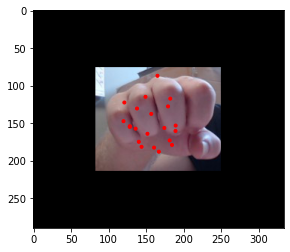

In [31]:
# visualize a prediction
from matplotlib.pyplot import Circle
a = 433
randomsayi = random.randint(0,a-1)


preds = model.predict(input_tensor[-a:])


fig, ax = plt.subplots(1)
ax.set_aspect('equal')

ax.imshow(input_tensor[randomsayi].reshape(input_tensor.shape[1:4]))

for xx, yy in preds[randomsayi].reshape((21,2)):
    circ = Circle((xx,yy),2,color='red')
    ax.add_patch(circ)

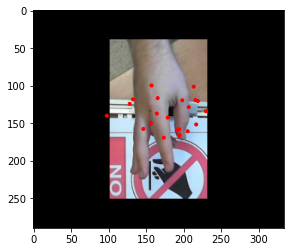

In [32]:
# visualize a prediction
from matplotlib.pyplot import Circle
a = 433
randomsayi = random.randint(0,a-1)


preds = model.predict(input_tensor[-a:])


fig, ax = plt.subplots(1)
ax.set_aspect('equal')

ax.imshow(input_tensor[randomsayi].reshape(input_tensor.shape[1:4]))

for xx, yy in preds[randomsayi].reshape((21,2)):
    circ = Circle((xx,yy),2,color='red')
    ax.add_patch(circ)

In [33]:
model.save('model2_10_epoch.h5')

### Own Image

(290, 334, 3)


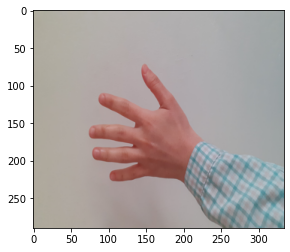

In [35]:
from PIL import Image
image = Image.open("el1.jpg")

newsize = (334, 290)
im1 = image.resize(newsize) 
plt.imshow(im1) 

im1=np.asarray(im1)
print(im1.shape)

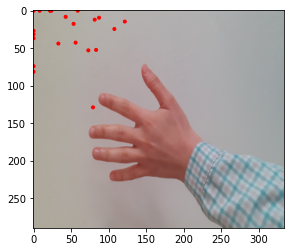

In [36]:
preds = model.predict(np.asarray([im1]))

fig, ax = plt.subplots(1)
ax.set_aspect('equal')

ax.imshow(im1)

for xx, yy in preds.reshape((21,2)):
    circ = Circle((xx,yy),2,color='red')
    ax.add_patch(circ)

In [37]:
del model